In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/houseprices-project1/data_description.txt
/kaggle/input/houseprices-project1/sample_submission.csv
/kaggle/input/houseprices-project1/test.csv
/kaggle/input/houseprices-project1/train.csv


In [10]:
original_train_set = pd.read_csv('/kaggle/input/houseprices-project1/train.csv')
original_test_set = pd.read_csv('/kaggle/input/houseprices-project1/test.csv')

train_set = original_train_set.copy()
test_set = original_test_set.copy()

Data loaded, now time to examine the data

In [11]:
print('Number of entries in train set is: {}'.format(train_set.Id.count()))
print('Number of empty Sale prices is: {}'.format(len(train_set) - train_set['SalePrice'].count()))
train_set.head()

Number of entries in train set is: 1460
Number of empty Sale prices is: 0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* 81 Columns in train_set, with a target 'SalePrice' and a 'id' column
* Hence, 79 features
* Many columns have missing values
* As expected for the train set, we have no missing SalePrice values

In [12]:
print('Number of entries in test set is: {}'.format(test_set.Id.count()))
test_set.head()

Number of entries in test set is: 1459


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


* Combine train and test data sets so we can manipluate both simultaneously
* Create new columns so we can restore train and test later


In [13]:
train_set['type'] = 1
test_set['type'] = 0
completedf = pd.concat([train_set,test_set],axis=0)

In [14]:
completedf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,type
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


#                       Preparing data for modelling

### Visualising the distibution of the data for features

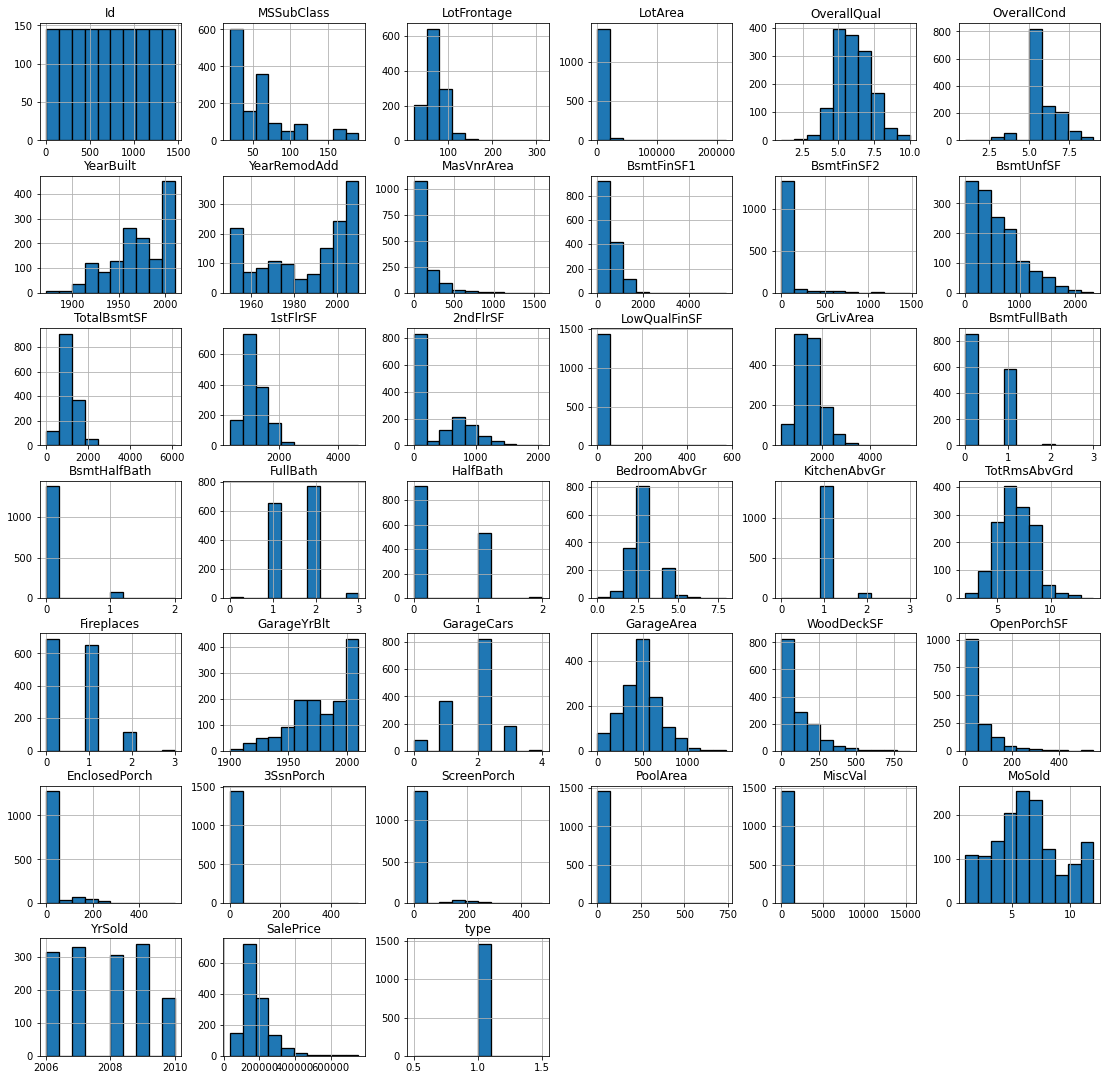

In [15]:
train_set.hist(edgecolor='black', linewidth=1.3, figsize=(19, 19));

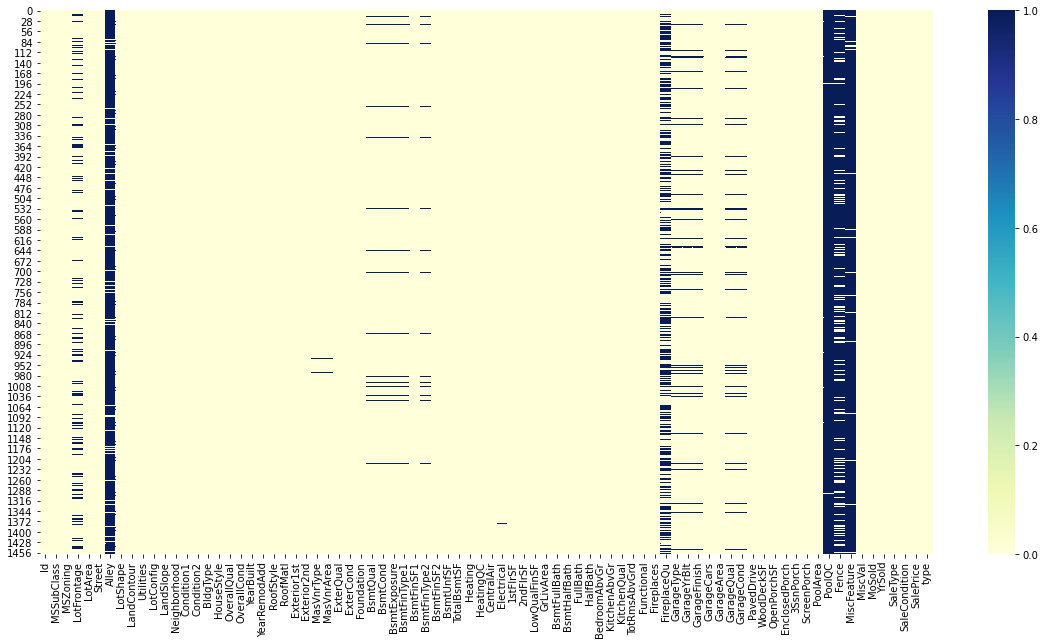

In [16]:
#Visualising the NA values in the form of a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(train_set.isnull(), cmap='YlGnBu')

In [17]:
#Observing the 'worst' columns
navalues = [(column,completedf[column].isna().mean()*100) for column in completedf]
navalues = pd.DataFrame(navalues,columns=['Column','percentage'])
navalues = navalues.sort_values('percentage',ascending=False)
navalues.head()

,Column,percentage
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506
80,SalePrice,49.982871


* The top 4 features are mostly empty
* We already have 79 features so we will probably experience the 'Curse of Dimensionality'
* Dropping these columns will improve our models accuracy

In [18]:
completedf = completedf.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

### Next, we should deal with 'NA' values. <br>
#### First check data types



In [19]:
completedf.dtypes.value_counts()

object     39
int64      27
float64    12
dtype: int64

* For object types, we should fill with most popular, or with 'None' (which will be encoded to just 0's)

In [20]:
objects = completedf.select_dtypes('object')
objectna = pd.DataFrame([(column,completedf[column].isna().sum()) for column in objects],columns=['feature','na_count'])
objectna = objectna[objectna.na_count > 0].sort_values('na_count',ascending=False)
objectna

,feature,na_count
31,FireplaceQu,1420
35,GarageCond,159
34,GarageQual,159
33,GarageFinish,159
32,GarageType,157
21,BsmtCond,82
22,BsmtExposure,82
20,BsmtQual,81
24,BsmtFinType2,80
23,BsmtFinType1,79


* Using the above table, and the data description, we see we should replace the first 15 features NA values with 'None'. 
* This is because the feature doesn't exist e.g no garage so GarageQual NA's should be filled with 'None'

In [21]:
#fetching the columns to set NA values to None
objects_for_none = ['FireplaceQu','GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 
                    'BsmtCond','BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType',
                   ]

In [22]:
#setting NA's to None
completedf[objects_for_none] = completedf[objects_for_none].fillna('None')

In [23]:
objects_for_most_popular = [c for c in objects.columns if (c not in objects_for_none)&(completedf[c].isna().sum() > 0)]
objects_for_most_popular

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'Electrical',
 'KitchenQual',
 'Functional',
 'SaleType']

In [24]:
for feature in objects_for_most_popular:
    completedf[feature].fillna(completedf[feature].value_counts().idxmax(),inplace=True)

Now lets check to see if it has worked

In [25]:
objects = completedf.select_dtypes('object')
objectna = pd.DataFrame([(column,completedf[column].isna().sum()) for column in objects],columns=['feature','na_count'])
objectna = objectna[objectna.na_count > 0].sort_values('na_count',ascending=False)
objectna

,feature,na_count


* No more NA values for type 'object', so it has worked
* Now we need to deal with the int/float types

* First, let's look at what we're dealing with

In [26]:
int_floats = completedf.select_dtypes(exclude='object')
int_float_nas = pd.DataFrame([(column,completedf[column].isna().sum()) for column in int_floats],columns=['feature','na_count'])
int_float_nas = int_float_nas[int_float_nas.na_count > 0].sort_values('na_count',ascending=False)
int_float_nas

,feature,na_count
37,SalePrice,1459
2,LotFrontage,486
25,GarageYrBlt,159
8,MasVnrArea,23
17,BsmtFullBath,2
18,BsmtHalfBath,2
9,BsmtFinSF1,1
10,BsmtFinSF2,1
11,BsmtUnfSF,1
12,TotalBsmtSF,1


* SalePrice NA's come from the test set
* For int/float types we should consider using the mean
* For GarageYrBlt we can get insight from current data of how to fill it in

In [27]:
grg_insight = pd.DataFrame(completedf['YearBuilt'] - completedf['GarageYrBlt'],columns=['Difference'])
grg_insight[grg_insight.Difference >= 0].value_counts()

Difference
0.0           2216
1.0              7
5.0              2
20.0             1
18.0             1
15.0             1
10.0             1
9.0              1
7.0              1
6.0              1
3.0              1
2.0              1
dtype: int64

From this we can see we should replace 'GarageYrBlt' with 'YearBuilt' in the case of NA value in GarageYrBlt

In [28]:
completedf['GarageYrBlt'] = completedf['GarageYrBlt'].fillna(completedf['YearBuilt'])
completedf['GarageYrBlt'].isna().sum()

0

Now for LotFrontage

In [66]:
print(completedf['LotFrontage'].value_counts())
print('Mean: {}'.format(np.round(completedf['LotFrontage'].mean(),2)))
print('Median: {}'.format(completedf['LotFrontage'].median()))

68.0     530
60.0     276
80.0     137
70.0     133
50.0     117
        ... 
137.0      1
182.0      1
119.0      1
195.0      1
141.0      1
Name: LotFrontage, Length: 128, dtype: int64
Mean: 69.09
Median: 68.0


Afer a quick analysis, I decide to replace the NA values from 'LotFrontage' with the median

In [67]:
completedf['LotFrontage'] = completedf['LotFrontage'].fillna(68)
print('NA values left for LotFrontage: {}'.format(completedf['LotFrontage'].isna().sum()))

NA values left for LotFrontage: 0


For the rest of NA values, i've decided to replace them with 0, due to the data descriptions and the quantity of NA's

In [69]:
fill_with_0 = [c for c in int_floats.columns if c not in ['LotFrontage','GrgYrBlt']]
completedf[fill_with_0] = completedf[fill_with_0].fillna(0)

##Amount of NA values left - should be 0
print('Total NA values left: {}'.format((len(completedf) - completedf.count()).sum()))


Total NA values left: 0


Now we need to prepare the features for analysis
* We need to one hot encode features such as street, sale type etc
* For some features we can use Ordinal Feature Econding instead of one hot encoding 
* This will greatly reduce the amount of variables for the model

Ordinal encoding:

In [32]:
ordinal_feature_dict = {'None':0,'Reg': 4,'IR1':3,'IR2':2,'IR3':1,'Lvl':4,'Bnk':3,'HLS':2,'Low':1,'Allpub':4,
'NoSewr':3,'NoSeWa':2,'ELO':1,'Gtl':3,'Mod':2,'Sev':1,'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Av':3,'Mn':2,'No':1,
'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'N':0,'Y':2,'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,
'Maj2':5,'Sev':6,'Sal':7,'Fin':3,'RFn':2,'Unf':1,'P':1,'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1, 'AllPub':4,'NoSewr':3,
'NoSeWa':2,'ELO':1
}

In [33]:
ordinal_feature_list = ['LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond',
'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu',
'GarageFinish','GarageQual','GarageCond','PavedDrive']

for feature in ordinal_feature_list:
    completedf[feature] = completedf[feature].map(ordinal_feature_dict)

In [34]:
completedf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,type
0,1,60,RL,65.0,8450,Pave,4,4,4,Inside,...,0,0,0,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,4,4,4,FR2,...,0,0,0,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,3,4,4,Inside,...,0,0,0,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,3,4,4,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,3,4,4,FR2,...,0,0,0,0,12,2008,WD,Normal,250000.0,1


One hot encoding:

In [35]:
onehotencode_list = [feature for feature in objects.columns if feature not in ordinal_feature_list]

completedf = pd.get_dummies(completedf,columns=onehotencode_list)
completedf.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,4,4,4,3,7,5,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,4,4,4,3,6,8,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,3,4,4,3,7,5,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,3,4,4,3,7,5,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,3,4,4,3,8,5,...,0,0,0,1,0,0,0,0,1,0


Finally we must seperate the test and training set again

In [36]:
train_set = completedf[completedf.type == 1]
test_set = completedf[completedf.type != 1]
features = [c for c in train_set.columns if c not in ['Id','type','SalePrice']]

train_data = train_set.drop(['Id','SalePrice','type'],axis=1)
labels = train_set['SalePrice']

test_set_predict = test_set.drop(['SalePrice','Id','type'],axis=1)

# Now we need to model the data

# First, Sci-Kit linear regression

In [73]:
model = LinearRegression()


x_train,x_test,y_train,y_test = train_test_split(train_data,labels,train_size =0.8,random_state = 10)

In [74]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8688361290006301

In [70]:
model.fit(train_data,labels)
prediction = model.predict(test_set_predict)
submission = pd.DataFrame({'Id':test_set['Id'],'SalePrice_scikit':prediction})
submission.head()

,Id,SalePrice_scikit
0,1461,119358.328125
1,1462,149511.781250
2,1463,176315.984375
3,1464,188005.875000
4,1465,183605.656250


# TensorFlow / Keras

#### This is slightly overkill for such a small dataset though, and hence the most time inefficient

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as L

In [43]:
# Incase we need to make changes to the graph
s = keras.backend.clear_session()

### Creating the model

In [79]:
model = keras.models.Sequential()
model.add(L.Dense(units=300,activation=tf.nn.selu,input_shape=(None,train_data.shape[1])))
model.add(L.Dense(units=300,activation=tf.nn.selu))
model.add(L.Dense(units=1))

### Compiling the model and fitting to data
* Using an exponentially decaying learning rate
* 1000 epochs as model seems to converge around here
* Due to decaying LR, early stopping is not neccessary

In [80]:
epochs=1000
initial_lr = 0.1
def lr_scheduler(epoch):
    return initial_lr*0.992**epoch
    #return initial_lr*(1-0.999*np.floor(epoch/750))
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        count=0
        if epoch%50 == 0:
            print('','\t{}'.format(epoch))
        print('.',end='')


model.compile(loss='mean_squared_error',optimizer=keras.optimizers.RMSprop(learning_rate = initial_lr),metrics=['mae'])

history = model.fit(train_data, labels, epochs=epochs,
                    validation_split=0.2,
                    callbacks=[
                    keras.callbacks.LearningRateScheduler(lr_scheduler),
                    LrHistory()],
                    verbose=0,
                    shuffle = True)


 	0
.................................................. 	50
.................................................. 	100
.................................................. 	150
.................................................. 	200
.................................................. 	250
.................................................. 	300
.................................................. 	350
.................................................. 	400
.................................................. 	450
.................................................. 	500
.................................................. 	550
.................................................. 	600
.................................................. 	650
.................................................. 	700
.................................................. 	750
.................................................. 	800
.................................................. 	850
.............................................

In [81]:
past_performance = pd.DataFrame(history.history)
past_performance['epoch'] = history.epoch
past_performance.tail()

,loss,mae,val_loss,val_mae,lr,epoch
995,690903040.0,16119.340820,2.981516e+09,22908.476562,0.000034,995
996,690944448.0,16122.450195,2.982942e+09,22912.548828,0.000034,996
997,691153472.0,16123.513672,2.982556e+09,22911.458984,0.000033,997
998,690956800.0,16122.008789,2.981007e+09,22907.265625,0.000033,998
999,691085056.0,16122.849609,2.982058e+09,22909.494141,0.000033,999


(3000.0, 58000.0)

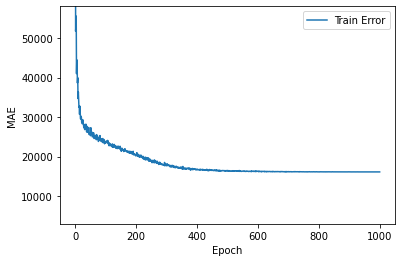

In [87]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(past_performance['epoch'],past_performance['mae'],label='Train Error')
plt.legend()
plt.ylim([3000,58000])

In [83]:
print('Mean average loss is: ${}'.format(np.round(past_performance.mae.iloc[-1],2)))

Mean average loss is: $16122.85


### Visualising the predictions <br>
Perfect predictions would lie on the red line

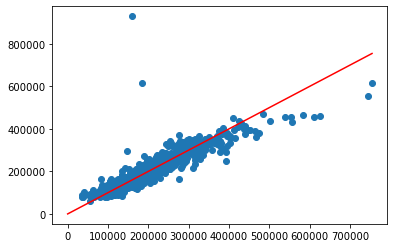

In [84]:
test_predictions = model.predict(train_data).flatten()

fig,ax = plt.subplots()
plt.scatter(labels,test_predictions)
diagonal = np.linspace(0,np.max(labels),100)
plt.plot(diagonal,diagonal,'-r')
plt.show()

### Adding submission to table

In [50]:
test_predictions = model.predict(test_set_predict)
submission['SalePrice_Keras'] = test_predictions
submission.head()

,Id,SalePrice_scikit,SalePrice_Keras
0,1461,118674.898773,132583.703125
1,1462,163968.109159,138208.812500
2,1463,178345.651450,206446.921875
3,1464,182207.630952,208646.468750
4,1465,214570.250642,172721.500000


# Random Forest Regression

#### Fitting model and plotting predictions

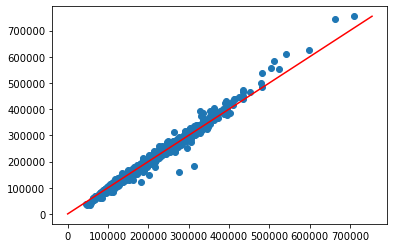

In [51]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state=10)
model.fit(train_data,labels)
train_predictions = model.predict(train_data)

fig,ax = plt.subplots()
plt.scatter(train_predictions,labels)
diagonal = np.linspace(0,np.max(labels),100)
plt.plot(diagonal,diagonal,'-r')
plt.show()

In [52]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
print('MAE:\t$%.2f' % mean_absolute_error(train_predictions, labels))
print('MSLE:\t%.5f' % mean_squared_log_error(train_predictions, labels))

MAE:	$6383.11
MSLE:	0.00335


### Adding submission

In [53]:
test_predictions = model.predict(test_set_predict)
submission['SalePrice_RFC'] = test_predictions
submission.head()

,Id,SalePrice_scikit,SalePrice_Keras,SalePrice_RFC
0,1461,118674.898773,132583.703125,127516.50
1,1462,163968.109159,138208.812500,154992.50
2,1463,178345.651450,206446.921875,184292.44
3,1464,182207.630952,208646.468750,184613.32
4,1465,214570.250642,172721.500000,201101.46


# XGBoost

In [54]:
import xgboost as xgb

model = xgb.XGBRegressor()

x_train,x_test,y_train,y_test = train_test_split(train_data,labels,train_size =0.8,random_state = 10)

### Training and plotting predictions

0.8697407325243781


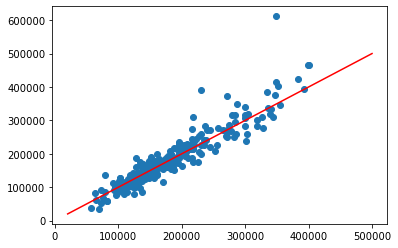

In [55]:
model.fit(x_train,y_train)
print(model.score(x_test,y_test))
train_predictions = model.predict(x_test)
fig,ax = plt.subplots()
plt.scatter(train_predictions,y_test)
diagonal = np.linspace(20000,500000)
plt.plot(diagonal,diagonal,'-r')
plt.show()

### Adding submission

In [56]:
model.fit(train_data,labels)
prediction = model.predict(test_set_predict)
submission['SalePrice_XGBoost'] = prediction
submission.head()

,Id,SalePrice_scikit,SalePrice_Keras,SalePrice_RFC,SalePrice_XGBoost
0,1461,118674.898773,132583.703125,127516.50,119358.328125
1,1462,163968.109159,138208.812500,154992.50,149511.781250
2,1463,178345.651450,206446.921875,184292.44,176315.984375
3,1464,182207.630952,208646.468750,184613.32,188005.875000
4,1465,214570.250642,172721.500000,201101.46,183605.656250


# Submitting

In [57]:
submission_SciKit = submission[['Id','SalePrice_scikit']]
submission_SciKit = submission_SciKit.rename(columns={'SalePrice_scikit': 'SalePrice'})
submission_SciKit.to_csv('submission_SciKit.csv',index=False)

In [58]:
submission_Keras = submission[['Id','SalePrice_Keras']]
submission_Keras = submission_Keras.rename(columns={'SalePrice_Keras': 'SalePrice'})
submission_Keras.to_csv('submission_Keras.csv',index=False)

In [59]:
submission_RFC = submission[['Id','SalePrice_RFC']]
submission_RFC = submission_RFC.rename(columns={'SalePrice_RFC': 'SalePrice'})
submission_RFC.to_csv('submission_RFR.csv',index=False)

In [60]:
submission_XGBoost = submission[['Id','SalePrice_XGBoost']]
submission_XGBoost = submission_XGBoost.rename(columns={'SalePrice_XGBoost': 'SalePrice'})
submission_XGBoost.to_csv('submission_XGBoost.csv',index=False)

In [61]:
submission['best_subm'] = (submission.SalePrice_Keras * 0.30 + submission.SalePrice_RFC * 0.20+ 
                           submission.SalePrice_scikit * 0.1 + submission.SalePrice_XGBoost*0.40)
submission_best = submission[['Id','best_subm']]
submission_best = submission_best.rename(columns={'best_subm': 'SalePrice'})
submission_best.to_csv('submission_combo.csv',index=False)

In [62]:
submission.head()

,Id,SalePrice_scikit,SalePrice_Keras,SalePrice_RFC,SalePrice_XGBoost,best_subm
0,1461,118674.898773,132583.703125,127516.50,119358.328125,124889.235190
1,1462,163968.109159,138208.812500,154992.50,149511.781250,148662.670291
2,1463,178345.651450,206446.921875,184292.44,176315.984375,187153.529708
3,1464,182207.630952,208646.468750,184613.32,188005.875000,192939.720064
4,1465,214570.250642,172721.500000,201101.46,183605.656250,186936.035814
